# 10) Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    print('Weights\n',weights)
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    print(wei)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    print('Shape of xmat is:',m,n)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred


In [12]:
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    print('Sortindex:',sortindex)
    xsort = X[sortindex][:,0]
    print('Xsort:',xsort)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(height,weight, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show();

[6.   5.92 5.58 5.92 5.   5.5  5.42 5.75]
[180 190 170 165 100 150 130 150]
mheight 
 [[6.   5.92 5.58 5.92 5.   5.5  5.42 5.75]]
mweight 
 [[180 190 170 165 100 150 130 150]]
Shape of m: 8
one:
 [[1. 1. 1. 1. 1. 1. 1. 1.]]
X: [[1.   6.  ]
 [1.   5.92]
 [1.   5.58]
 [1.   5.92]
 [1.   5.  ]
 [1.   5.5 ]
 [1.   5.42]
 [1.   5.75]]
Shape of xmat is: 8 2
Weights
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.99964451 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.99024786 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.99964451 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.94595947 0.
  0.         0.     

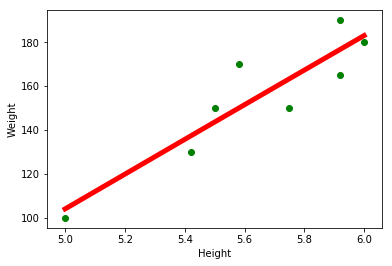

Shape of xmat is: 8 2
Weights
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.99996049 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.9989117  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.99996049 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.99384617 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.99845798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.99792561 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.99961427]]
Weights
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]


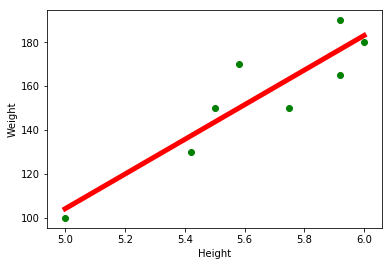

In [13]:
# load data points
data = pd.read_csv('Gender.csv')
height = np.array(data.height) # We use only Height and Weight data
print(height)
weight = np.array(data.weight)
print(weight)
mheight = np.mat(height) # .mat will convert nd array is converted in 2D array
print('mheight \n',mheight)
mweight = np.mat(weight)
print('mweight \n',mweight)
m= np.shape(mheight)[1]
print('Shape of m:',m)
one = np.mat(np.ones(m))
print('one:\n',one)
X = np.hstack((one.T,mheight.T)) # 8 rows, 2 cols
print('X:',X)
# Prediction with k=3
ypred = localWeightRegression(X,mweight,3)
graphPlot(X,ypred)
# Prediction with k=9
ypred = localWeightRegression(X,mweight,9)
graphPlot(X,ypred)
